In [20]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [2]:
df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('test (1).csv')


In [3]:
print(df_train)

            id  age  alcohol_consumption_per_week  \
0            0   31                             1   
1            1   50                             2   
2            2   32                             3   
3            3   54                             3   
4            4   54                             1   
...        ...  ...                           ...   
699995  699995   29                             1   
699996  699996   46                             2   
699997  699997   35                             1   
699998  699998   49                             2   
699999  699999   42                             4   

        physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                       45         7.7                  6.8   
1                                       73         5.7                  6.5   
2                                      158         8.5                  7.4   
3                                       77     

<Axes: xlabel='gender', ylabel='count'>

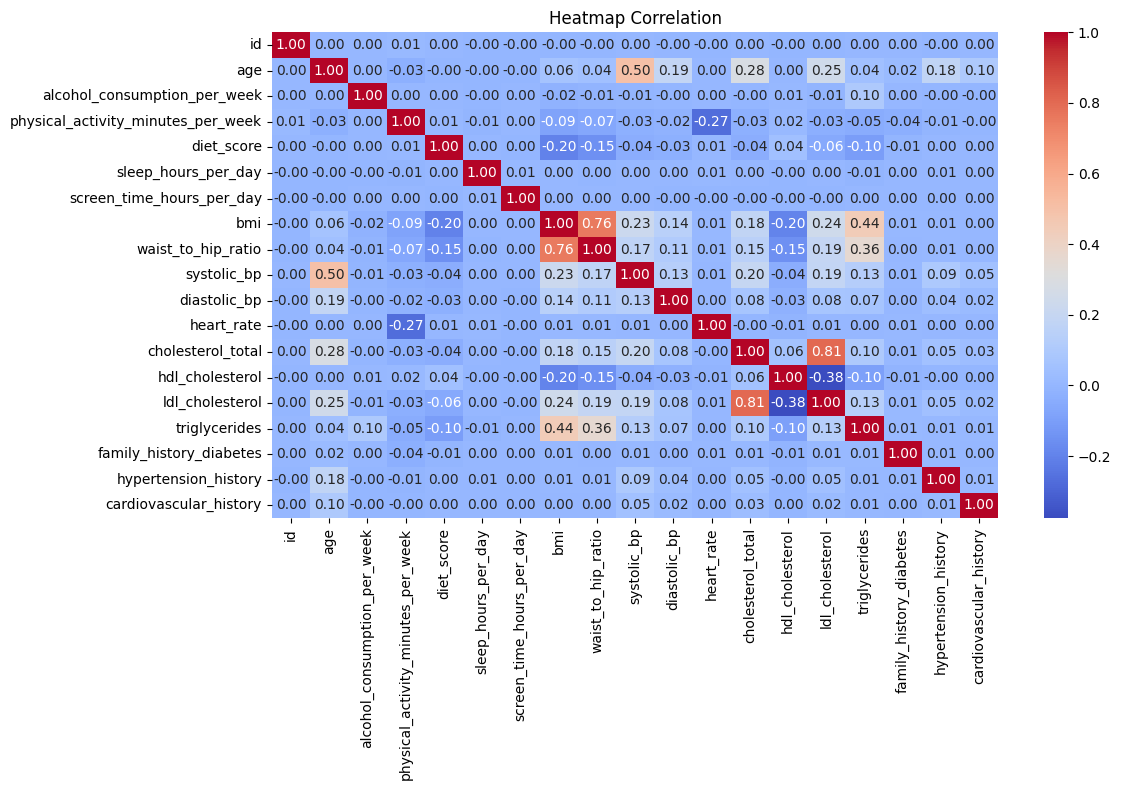

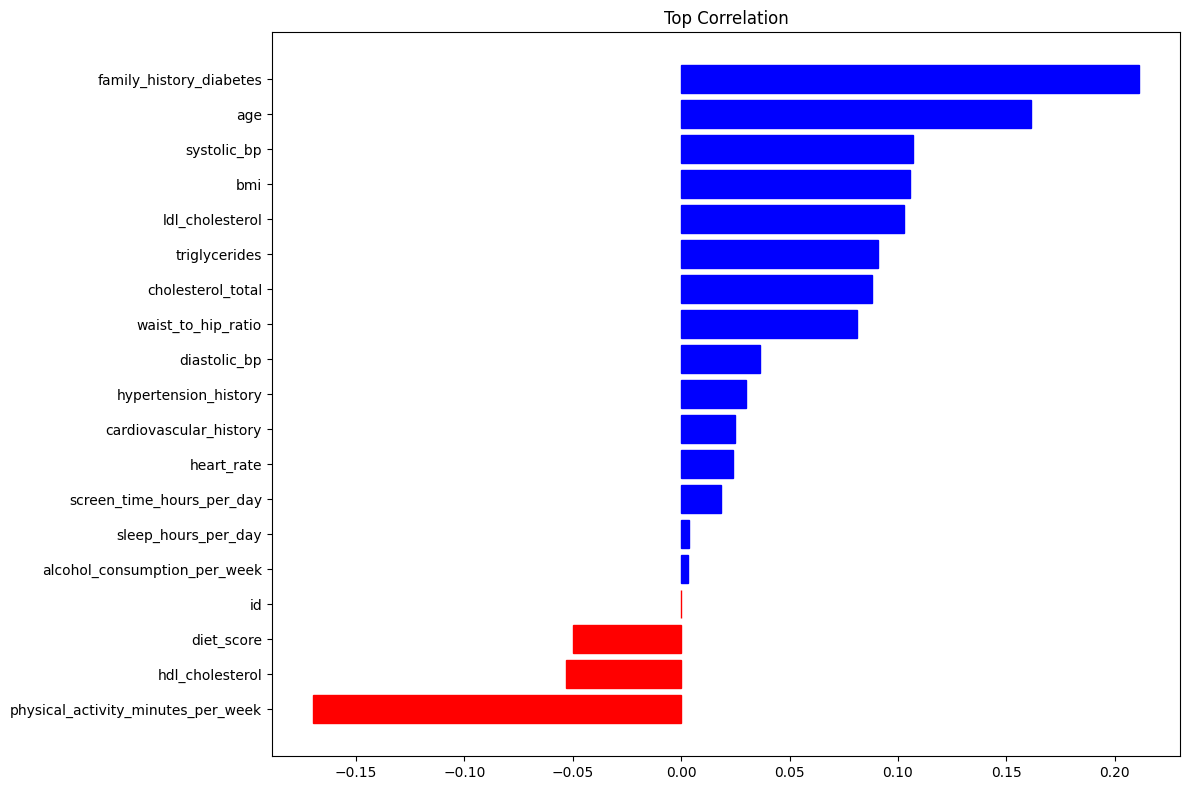

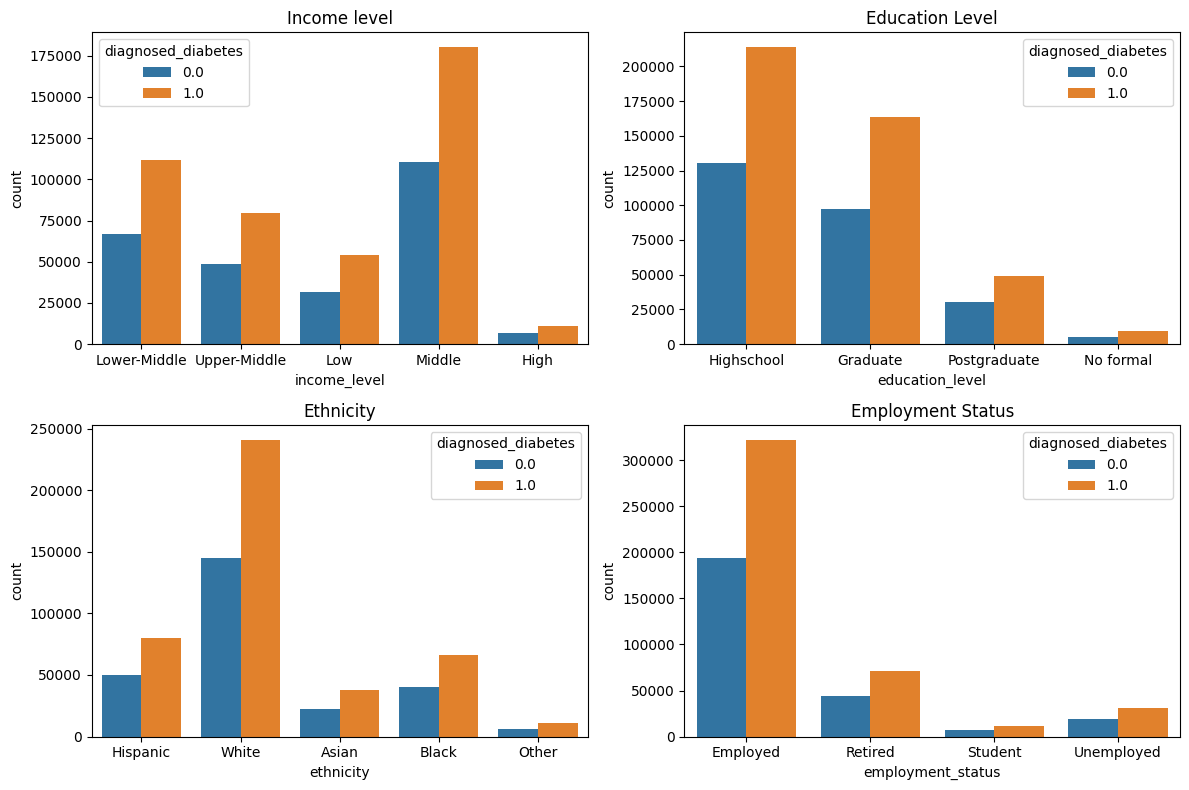

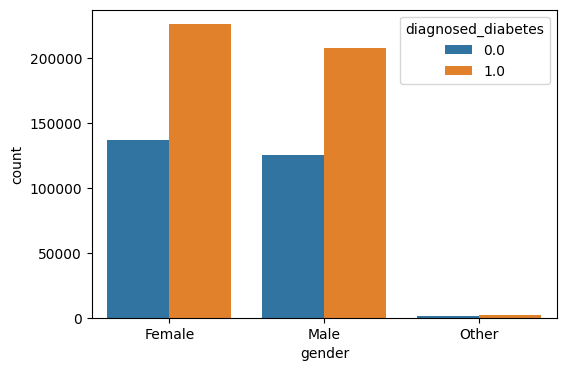

In [3]:
# EDA
# Heatmap
train_corr = df_train.copy()
train_corr = train_corr.drop(columns=['diagnosed_diabetes'])
train_corr = train_corr.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.tight_layout()

# Top Corr
top_corr = df_train.copy()
top_corr = top_corr.corr(numeric_only=True)['diagnosed_diabetes'].sort_values(ascending=True).drop('diagnosed_diabetes')

plt.figure(figsize=(12,8))
bars = plt.barh(top_corr.index, top_corr)

for item, col in zip(top_corr, bars):
    if item > 0:
        col.set_color('blue')
    else:
        col.set_color('red')

plt.title('Top Correlation')
plt.tight_layout()

# EDA Kategorikal
fig, axis = plt.subplots(2,2, figsize=(12,8))

sns.countplot(x='income_level', hue='diagnosed_diabetes', data=df_train, ax=axis[0,0])
axis[0,0].set_title('Income level')
sns.countplot(x='education_level', hue='diagnosed_diabetes', data=df_train, ax=axis[0,1])
axis[0,1].set_title('Education Level')
sns.countplot(x='ethnicity', hue='diagnosed_diabetes', data=df_train, ax=axis[1,0])
axis[1,0].set_title('Ethnicity')
sns.countplot(x='employment_status', hue='diagnosed_diabetes', data=df_train, ax=axis[1,1])
axis[1,1].set_title('Employment Status')
plt.tight_layout()

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='diagnosed_diabetes', data=df_train)

In [4]:
# Missing Value

Missing = []

total = len(df_train)

for col in df_train.columns:
    hitung = df_train[col].isnull().sum()
    if hitung > 0:
        persentase = (hitung / total) * 100

        Missing.append({
            'Nama Kolom' : col,
            'Jumlah' : hitung,
            'Persentase (%)' : persentase
        })

Missing_df = pd.DataFrame(Missing)
print(Missing_df)

Empty DataFrame
Columns: []
Index: []


In [5]:
# OHE
columns = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
df_all = pd.concat([df_train, df_test], axis=0)

df_OHE = pd.get_dummies(df_all, columns=columns, drop_first=True)

df_train_OHE = df_OHE.iloc[:len(df_train)]
df_test_OHE = df_OHE.iloc[len(df_train):]

In [6]:
# CrossValidation

X_train = df_train_OHE.drop(columns=['diagnosed_diabetes'])
y_train = df_train_OHE['diagnosed_diabetes']

X_test = df_test_OHE.drop(columns=['diagnosed_diabetes'])

In [7]:
# Check
print(X_train.shape)
print(X_test.shape)
print((X_train.columns == X_test.columns).all())


(700000, 37)
(300000, 37)
True


In [27]:
y_train.value_counts(normalize=True)


diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64

In [9]:
x_sub, _ , y_sub, _ = train_test_split(
    X_train,
    y_train,
    train_size=20_000,
    stratify=y_train,
    random_state=42
)

In [39]:
ML = []

In [40]:
# Logistic Regression

LR_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(max_iter=1000, random_state=42))
])

score_LR = cross_val_score(LR_pipe, x_sub, y_sub, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross Val Accuracy : {score_LR.mean():.2f}")

f1_LR  = cross_val_score(LR_pipe, x_sub, y_sub, cv=5, scoring='f1')
print(f"F1 Logistic: {f1_LR.mean():.2f}")

recall_LR = cross_val_score(LR_pipe, x_sub, y_sub, cv=5, scoring='recall')
print(f"Recall Logistic: {recall_LR.mean():.2f}")

ML.append({
    'Model' : 'Logistic Regression',
    'Accuracy' : score_LR.mean(),
    'F1 Score' : f1_LR.mean(),
    'Recall' : recall_LR.mean()
})

Logistic Regression Cross Val Accuracy : 0.66
F1 Logistic: 0.76
Recall Logistic: 0.86


In [41]:
# Random Forest Classifier

RF = RandomForestClassifier(random_state=42)

score_RF = cross_val_score(RF, x_sub, y_sub, cv=5, scoring='accuracy')
print(f"Random Forest Cross Val Accuracy Score : {score_RF.mean():.2f}")

f1_RF  = cross_val_score(RF, x_sub, y_sub, cv=5, scoring='f1')
print(f"F1 Random Forest: {f1_RF.mean():.2f}")

recall_RF = cross_val_score(RF, x_sub, y_sub, cv=5, scoring='recall')
print(f"Recall Random Forest: {recall_RF.mean():.2f}")

ML.append({
    'Model' : 'Random Forest',
    'Accuracy' : score_RF.mean(),
    'F1 Score' : f1_RF.mean(),
    'Recall' : recall_RF.mean()
})

Random Forest Cross Val Accuracy Score : 0.66
F1 Random Forest: 0.75
Recall Random Forest: 0.84


In [42]:
# SVC

SVC_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('SVC', LinearSVC())
])

svc_Score = cross_val_score(SVC_pipe, x_sub, y_sub, cv=5, scoring='accuracy')
print(f"SVC Accuracy score : {svc_Score.mean():.2f}")

f1_SVC  = cross_val_score(SVC_pipe, x_sub, y_sub, cv=5, scoring='f1')
print(f"F1 SVC: {f1_SVC.mean():.2f}")

recall_SVC = cross_val_score(SVC_pipe, x_sub, y_sub, cv=5, scoring='recall')
print(f"Recall SVC: {recall_SVC.mean():.2f}")

ML.append({
    'Model' : 'SVC',
    'Accuracy' : svc_Score.mean(),
    'F1 Score' : f1_SVC.mean(),
    'Recall' : recall_SVC.mean()
})

SVC Accuracy score : 0.66
F1 SVC: 0.76
Recall SVC: 0.87


In [43]:
# XGBOOST

XGBC = XGBClassifier()

XGBC_score = cross_val_score(XGBC, x_sub, y_sub, cv=5, scoring='accuracy')
print(f"XGBC Accuracy Score : {XGBC_score.mean():.2f}")

f1_XGBC = cross_val_score(XGBC, x_sub, y_sub, cv=5, scoring='f1')
print(f"F1 XGBC: {f1_XGBC.mean():.2f}")

recall_XGBC = cross_val_score(XGBC, x_sub, y_sub, cv=5, scoring='recall')
print(f"Recall XGBC: {recall_XGBC.mean():.2f}")

ML.append({
    'Model' : 'XGBoost Classifier',
    'Accuracy' : XGBC_score.mean(),
    'F1 Score' : f1_XGBC.mean(),
    'Recall' : recall_XGBC.mean()
})

XGBC Accuracy Score : 0.65
F1 XGBC: 0.74
Recall XGBC: 0.79


In [59]:
# Machine Learning Terbaik

ML = pd.DataFrame(ML)
ML

,Model,Accuracy,F1 Score,Recall
0,Logistic Regression,0.66190,0.759484,0.856569
1,Random Forest,0.65650,0.752874,0.839564
2,SVC,0.66335,0.762973,0.869404
3,XGBoost Classifier,0.64975,0.738458,0.793439


In [120]:
ML['Score'] = ML['Accuracy'] + ML['F1 Score'] + ML['Recall']
ML = ML.sort_values(by='Score', ascending=False).round(2)

print(f"Machine Learning Terbaik : {ML.iloc[0]['Model']}")


Machine Learning Terbaik : SVC


In [125]:
SVC_pipe.fit(X_train, y_train)

y_pred = SVC_pipe.predict(X_test)

Hasil = pd.DataFrame({
    "ID" : df_test['id'],
    "diagnosed_diabetes" : y_pred.astype(int)
})

Hasil

,ID,diagnosed_diabetes
0,700000,1
1,700001,1
2,700002,1
3,700003,1
4,700004,1
...,...,...
299995,999995,1
299996,999996,1
299997,999997,0
299998,999998,1


In [ ]:
Hasil.to_csv('Hasil_Prediksi_Diabetes.csv', index=False)